In [2]:
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import utils as ut
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
DATA_PATH = "../data/union/End"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final.csv")
    return pd.read_csv(csv_path)
df = load_data_prep()
df.label.value_counts()

label
1    42
0    25
Name: count, dtype: int64

In [5]:
dfdata = df[ut.labelpre.selecciona()]

In [6]:
dfdata.head()

,cod,ufsl_number_of_tracts,ufsl_mean_length,ufsl_span,ufsl_curl,ufsl_elongation,ufsl_diameter,ufsl_volume,ufsl_branch_volume,ufsl_total_surface_area,...,ufsr_irregularity,ufsr_area_of_end_region_1,ufsr_radius_of_end_region_1,ufsr_irregularity_of_end_region_1,ufsr_area_of_end_region_2,ufsr_radius_of_end_region_2,ufsr_irregularity_of_end_region_2,ufsr_qa,ufsr_iso,label
0,sub-10171,4055,80.8340,14.9888,5.39297,6.05374,13.3527,11319.40,2079.980,18854.00,...,6.44130,1553.130,8.82430,0.157508,1140.860,9.62320,0.255011,0.160238,0.503620,1
1,sub-10189,3081,45.2558,17.0350,2.65663,3.09389,14.6275,7605.05,2375.720,14165.20,...,7.02914,1175.130,9.02383,0.217693,933.249,10.12790,0.345293,0.071355,0.231146,1
2,sub-10206,1823,39.1042,14.7693,2.64767,3.26055,11.9931,4417.51,308.471,8943.72,...,6.49505,500.410,8.95602,0.503563,432.840,8.21973,0.490386,0.111454,0.257717,1
3,sub-10217,4153,52.4803,14.3708,3.65186,3.33640,15.7296,10198.20,3748.670,16447.90,...,6.07330,1210.380,8.68760,0.195896,970.462,8.48388,0.233002,0.156681,0.512934,1
4,sub-10225,1867,49.6928,20.5860,2.41391,3.77995,13.1464,6745.25,3588.060,15782.00,...,9.32503,307.492,11.83780,1.431720,383.876,12.60370,1.300050,0.210445,0.683337,1


In [7]:
dfdata.label.value_counts()

label
1    42
0    25
Name: count, dtype: int64

In [8]:
data1 = dfdata[dfdata['label'] == 0]
#data1 = data1.drop(['cod', 'label'], axis=1).groupby(by='afsl_qa').mean()
# The correlation between all pairs of variables is easily computed with Pandas.
corr_matrix =  data1.drop(['cod', 'label'], axis=1).corr()
print(corr_matrix.shape)
corr_matrix.iloc[:10, :10]

(80, 80)


,ufsl_number_of_tracts,ufsl_mean_length,ufsl_span,ufsl_curl,ufsl_elongation,ufsl_diameter,ufsl_volume,ufsl_branch_volume,ufsl_total_surface_area,ufsl_total_radius_of_end_regions
ufsl_number_of_tracts,1.000000,0.461458,-0.321878,0.518319,0.056534,0.525125,0.777719,0.067066,0.663068,0.350458
ufsl_mean_length,0.461458,1.000000,0.100011,0.554087,0.852853,-0.198541,0.495293,0.293343,0.573322,0.553607
ufsl_span,-0.321878,0.100011,1.000000,-0.723688,0.235609,-0.117290,-0.076967,0.234634,0.025293,0.206160
ufsl_curl,0.518319,0.554087,-0.723688,1.000000,0.404989,-0.115896,0.291068,-0.101500,0.259747,0.098409
ufsl_elongation,0.056534,0.852853,0.235609,0.404989,1.000000,-0.654385,-0.016438,0.118498,0.109535,0.234573
ufsl_diameter,0.525125,-0.198541,-0.117290,-0.115896,-0.654385,1.000000,0.739606,0.221912,0.643603,0.396477
ufsl_volume,0.777719,0.495293,-0.076967,0.291068,-0.016438,0.739606,1.000000,0.381340,0.949528,0.686956
ufsl_branch_volume,0.067066,0.293343,0.234634,-0.101500,0.118498,0.221912,0.381340,1.000000,0.497815,0.745813
ufsl_total_surface_area,0.663068,0.573322,0.025293,0.259747,0.109535,0.643603,0.949528,0.497815,1.000000,0.796837
ufsl_total_radius_of_end_regions,0.350458,0.553607,0.206160,0.098409,0.234573,0.396477,0.686956,0.745813,0.796837,1.000000


In [9]:
correlation_mat = corr_matrix
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

fatr_curl                          fatr_span                           -0.925564
fatr_span                          fatr_curl                           -0.925564
fatr_diameter                      fatr_elongation                     -0.908698
fatr_elongation                    fatr_diameter                       -0.908698
cfpr_irregularity_of_end_region_1  cfpr_diameter                       -0.877825
                                                                          ...   
fatr_irregularity_of_end_region_1  fatr_irregularity_of_end_region_1    1.000000
fatr_area_of_end_region_2          fatr_area_of_end_region_2            1.000000
fatr_radius_of_end_region_2        fatr_radius_of_end_region_2          1.000000
fatr_total_radius_of_end_regions   fatr_total_radius_of_end_regions     1.000000
ufsr_iso                           ufsr_iso                             1.000000
Length: 6400, dtype: float64

In [10]:
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.7)]


In [31]:
strong_pairs.to_csv('../data/union/End/strong_pairs_news.csv')
print(strong_pairs)

fatr_curl                          fatr_span                           -0.925564
fatr_span                          fatr_curl                           -0.925564
fatr_diameter                      fatr_elongation                     -0.908698
fatr_elongation                    fatr_diameter                       -0.908698
cfpr_irregularity_of_end_region_1  cfpr_diameter                       -0.877825
                                                                          ...   
fatr_irregularity_of_end_region_1  fatr_irregularity_of_end_region_1    1.000000
fatr_area_of_end_region_2          fatr_area_of_end_region_2            1.000000
fatr_radius_of_end_region_2        fatr_radius_of_end_region_2          1.000000
fatr_total_radius_of_end_regions   fatr_total_radius_of_end_regions     1.000000
ufsr_iso                           ufsr_iso                             1.000000
Length: 406, dtype: float64


In [ ]:
strong_pairs.info()

In [ ]:
print(strong_pairs.groupby(level=0).filter(lambda x: len(x)>=2).sort_values(ascending=True)[:10])

In [ ]:
positive_pairs = sorted_pairs[sorted_pairs > 0]
print(positive_pairs)

In [ ]:
print(strong_pairs.groupby(level=0).filter(lambda x: len(x)>=2).sort_values(ascending=False)[:10])

In [ ]:
fatr_curl
fatr_span
fatr_diameter
fatr_elongation
cfpr_irregularity_of_end_region_1
cfpr_diameter
cfpr_irregularity_of_end_region_2
fatr_volume
fatr_elongation


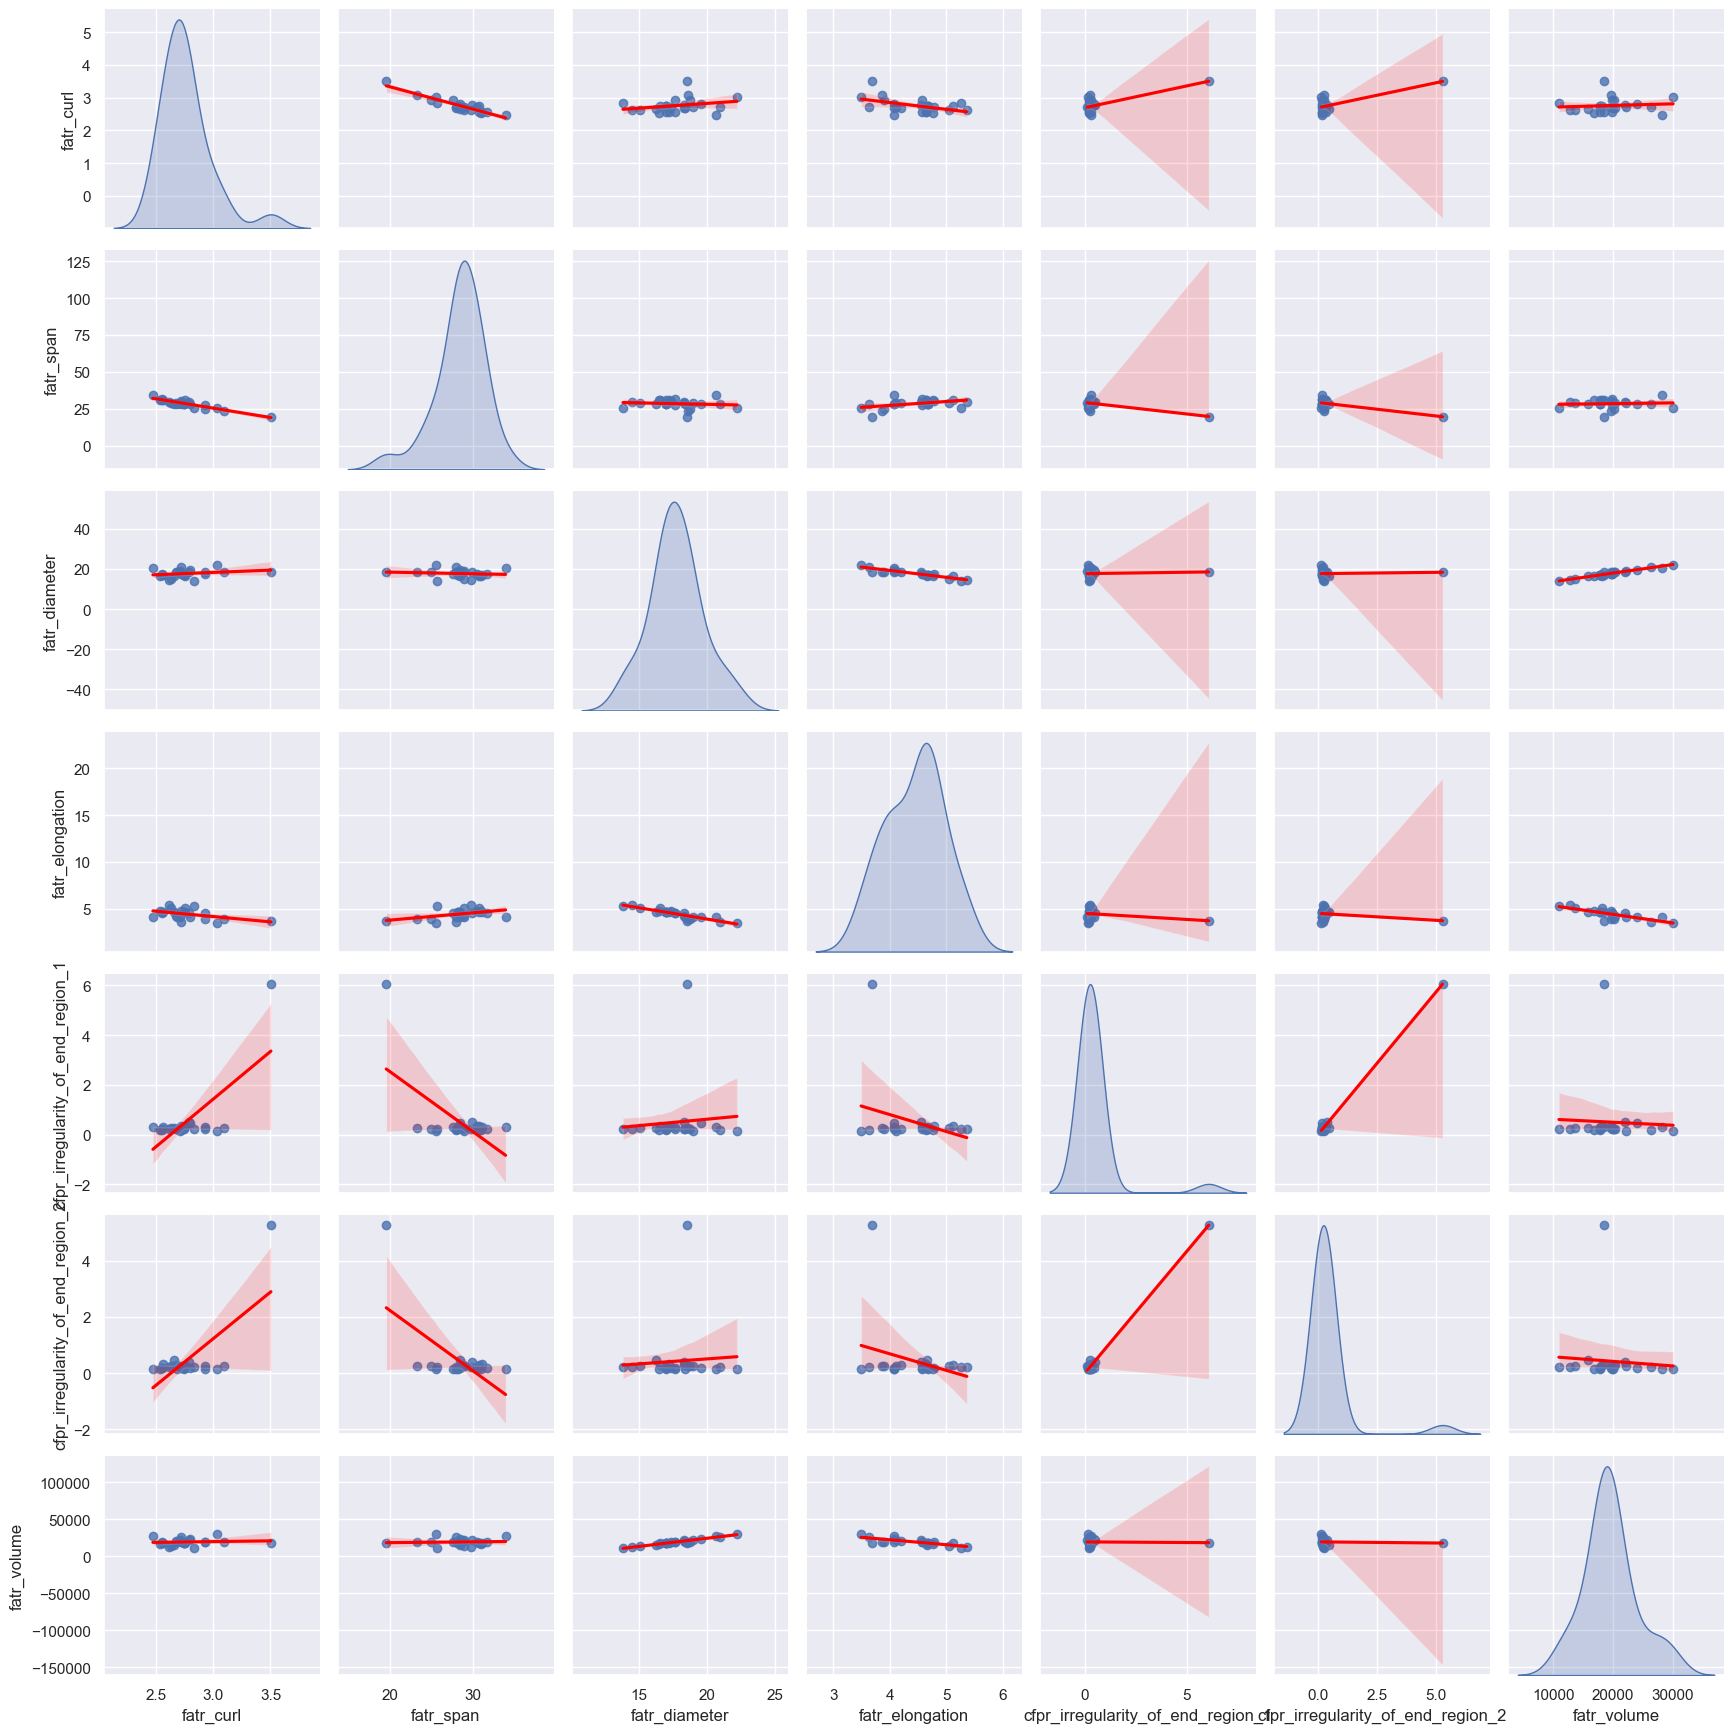

In [38]:
# Scatter plot:
labels=['fatr_curl', 'fatr_span','fatr_diameter', 'fatr_elongation', 'cfpr_irregularity_of_end_region_1', 'cfpr_irregularity_of_end_region_2',
        'fatr_volume']
sns.set()
sns.pairplot(data1[labels],kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}}, size = 2.5)
plt.tight_layout()
plt.show();

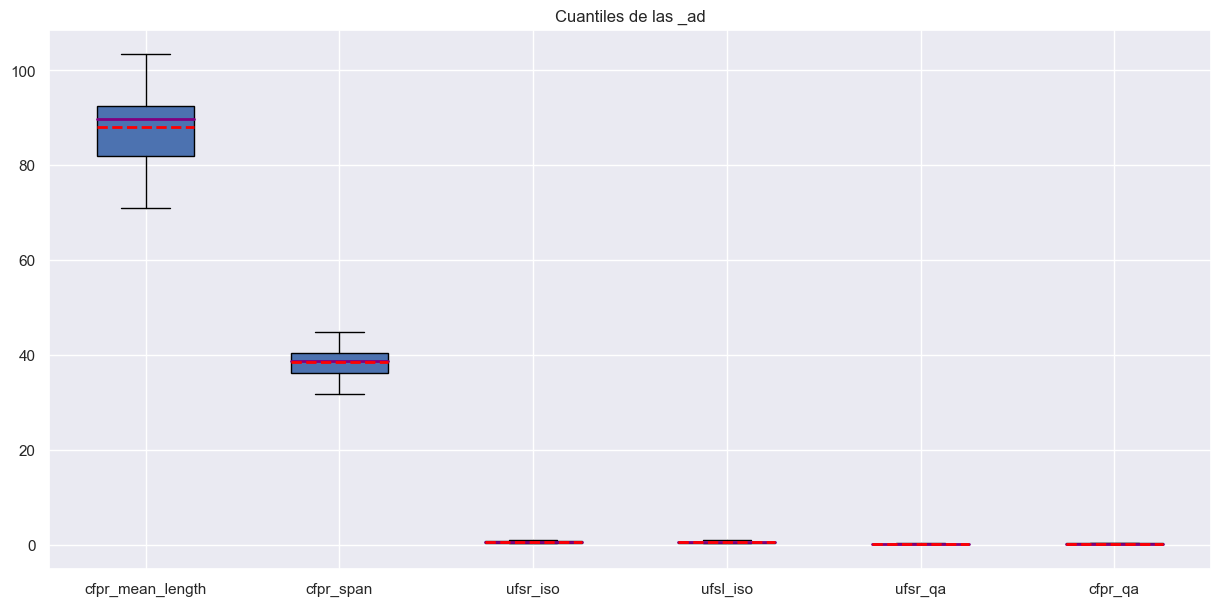

In [16]:
from matplotlib.pyplot import boxplot
data = df[df['label'] == 0]
data = data[['cfpr_mean_length', 'cfpr_span', 'ufsr_iso', 'ufsl_iso', 'ufsr_qa','cfpr_qa' ]]
fig, ax = plt.subplots( figsize=(15, 7))
ax.set_title('Cuantiles de las _ad')
ax.boxplot(data, showfliers=False, showmeans=True, meanline=True, 
           labels=['cfpr_mean_length', 'cfpr_span', 'ufsr_iso', 'ufsl_iso', 'ufsr_qa','cfpr_qa'], 
           patch_artist=True, medianprops={'linewidth': 2, 'color': 'purple'}, 
           meanprops={'linewidth': 2, 'color': 'red'})
fig.show()

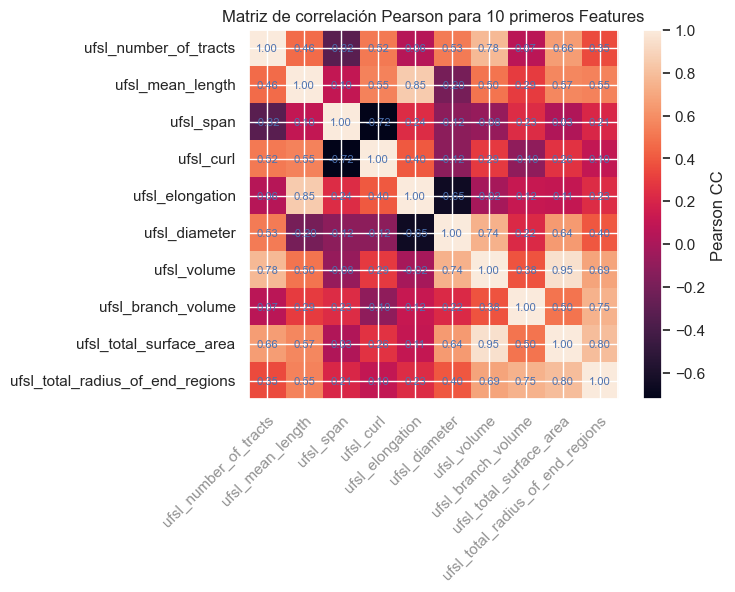

In [24]:
plt.imshow(corr_matrix.iloc[:10, :10])
labels = corr_matrix.iloc[:10, :10].columns.values
for i in range(10):
    for j in range(10):
        plt.text(i, j, "{:.2f}".format(corr_matrix.iloc[i, j]), ha='center', va='center', color='b', fontsize=8)
        
plt.title ('Matriz de correlación Pearson para 10 primeros Features')
xt = plt.xticks(np.arange(10), labels, rotation=45, ha='right', va='top', rotation_mode='anchor', alpha=0.5, label='x-axis')
yt = plt.yticks(np.arange(10), labels, rotation=0, ha='right', va='center')
plt.colorbar(label='Pearson CC')

In [ ]:
# Graficamos la correlacion entre las variables

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(17, 17))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks': [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True, annot_kws={"fontsize":8})


ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})